# Stock market forecasting

In [1]:
import yfinance as yf
df = yf.download('SBIN.NS',period='max',interval='1mo')
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,19.700714,16.705036,18.549620,12.229540,1587920924
1996-02-01,18.422243,24.460777,18.422243,22.672806,14.947904,1375442845
1996-03-01,22.927555,23.323835,20.474401,22.210480,14.643097,540202683
1996-04-01,21.700979,31.891005,21.700979,28.187685,18.583797,1937276750
1996-05-01,28.871737,29.390675,23.776726,26.182703,17.261938,3235907306


In [2]:
df.shape

(331, 6)

In [3]:
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=list(df.index),
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

fig.show()

## Close data price

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose
T = seasonal_decompose(df['Adj Close'],model='multiplicative')

<Axes: xlabel='Date'>

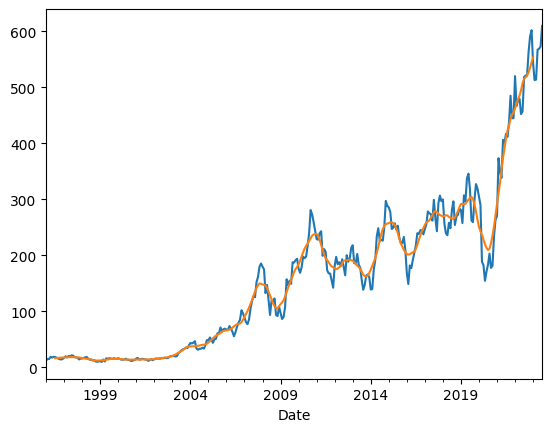

In [5]:
T.observed.plot()
T.trend.plot()

<Axes: xlabel='Date'>

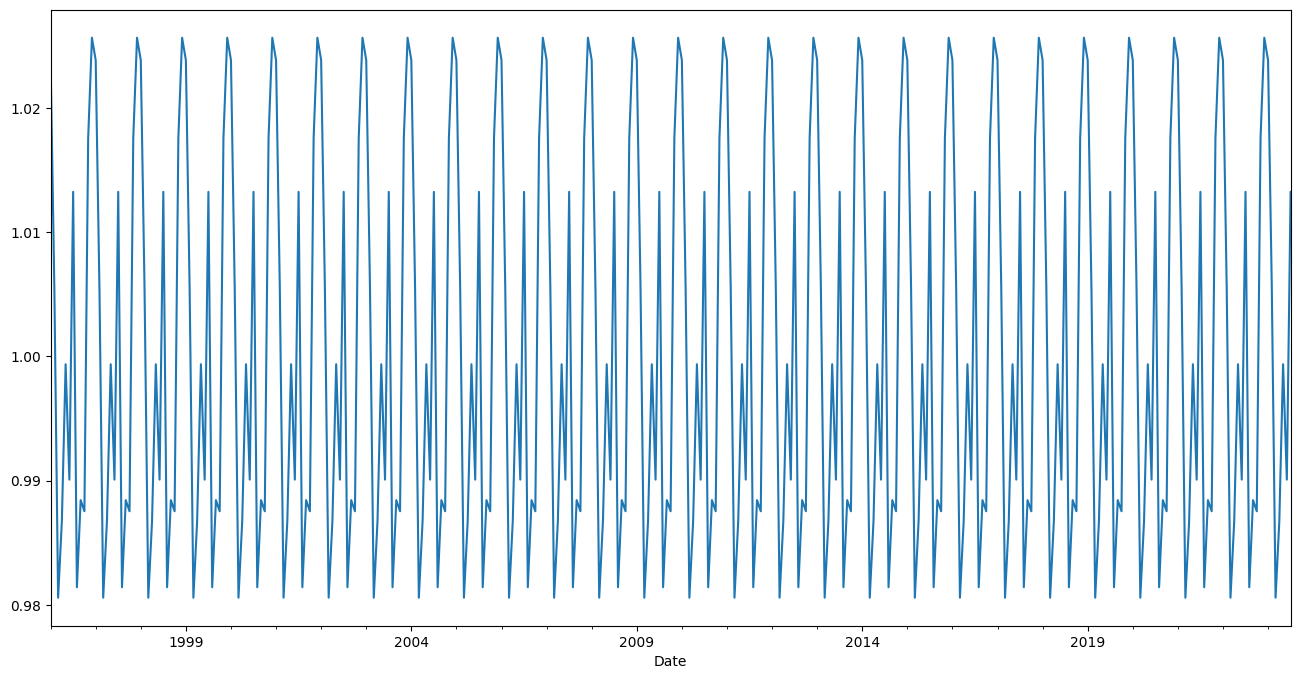

In [6]:
T.seasonal.plot(figsize=(16,8))

<Axes: xlabel='Date'>

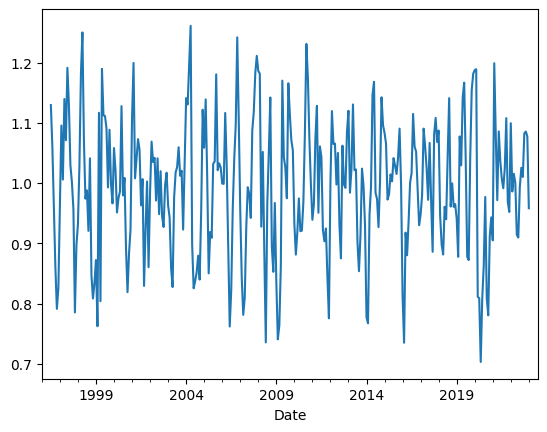

In [7]:
T.resid.plot()

## Time series forecast

In [8]:
from pmdarima.arima import auto_arima

In [9]:
model = auto_arima(df['Adj Close'],seasonal=True,m=12,suppress_warnings=True)

In [10]:
model.order

(2, 1, 1)

In [11]:
p = model.order[0]
d = model.order[1]
q = model.order[2]
print(f'Optimal p, d, q values are p={p}, d={d}, q={q} ')

Optimal p, d, q values are p=2, d=1, q=1 


In [12]:
forecast, conf_int = model.predict(n_periods=36, return_conf_int=True)

In [13]:
forecast

2023-08-01    606.710202
2023-09-01    608.785421
2023-10-01    613.691190
2023-11-01    607.328544
2023-12-01    608.460516
2024-01-01    623.946657
2024-02-01    623.008691
2024-03-01    625.770803
2024-04-01    622.608367
2024-05-01    621.326298
2024-06-01    623.241868
2024-07-01    628.006674
2024-08-01    630.381750
2024-09-01    631.897748
2024-10-01    637.751321
2024-11-01    643.175969
2024-12-01    646.036471
2025-01-01    639.974009
2025-02-01    638.622455
2025-03-01    640.239605
2025-04-01    648.076761
2025-05-01    650.152631
2025-06-01    652.187430
2025-07-01    657.451189
2025-08-01    658.696216
2025-09-01    660.557909
2025-10-01    662.298980
2025-11-01    662.873151
2025-12-01    664.502142
2026-01-01    668.543818
2026-02-01    670.362751
2026-03-01    672.288238
2026-04-01    672.969743
2026-05-01    674.416509
2026-06-01    676.210328
2026-07-01    677.993969
Freq: MS, dtype: float64

In [14]:
conf_int

array([[568.99915059, 644.42125291],
       [555.26085231, 662.30998963],
       [550.83932738, 676.54305265],
       [534.79243285, 679.86465453],
       [528.04219308, 688.87883984],
       [536.13165132, 711.76166287],
       [528.43691118, 717.58047146],
       [524.87969985, 726.66190645],
       [515.77255917, 729.4441741 ],
       [508.86027624, 733.79232042],
       [505.4137419 , 741.06999458],
       [505.05036411, 750.96298419],
       [503.4666743 , 757.29682617],
       [501.15015355, 762.64534197],
       [503.16439398, 772.33824854],
       [504.92953557, 781.42240212],
       [504.19244434, 787.88049704],
       [494.63322157, 785.31479731],
       [489.86352065, 787.3813898 ],
       [488.14014646, 792.3390636 ],
       [492.70849521, 803.44502695],
       [491.58288341, 808.72237817],
       [490.47961071, 813.89524883],
       [492.66502684, 822.23735138],
       [490.00021377, 827.3922186 ],
       [488.03398228, 833.08183597],
       [486.14997052, 838.44798936],
 

In [15]:
import pandas as pd
low_bound = conf_int[:,0]
low_bound = pd.Series(low_bound)
low_bound.index = forecast.index
low_bound.head()

2023-08-01    568.999151
2023-09-01    555.260852
2023-10-01    550.839327
2023-11-01    534.792433
2023-12-01    528.042193
Freq: MS, dtype: float64

In [16]:
upper_bound = conf_int[:,1]
upper_bound = pd.Series(upper_bound)
upper_bound.index=forecast.index
upper_bound.head()

2023-08-01    644.421253
2023-09-01    662.309990
2023-10-01    676.543053
2023-11-01    679.864655
2023-12-01    688.878840
Freq: MS, dtype: float64

In [17]:
df_forecast = forecast.to_frame()

In [18]:
df_forecast.columns= ['Forecast']

In [19]:
df_forecast

,Forecast
2023-08-01,606.710202
2023-09-01,608.785421
2023-10-01,613.691190
2023-11-01,607.328544
2023-12-01,608.460516
2024-01-01,623.946657
2024-02-01,623.008691
2024-03-01,625.770803
2024-04-01,622.608367
2024-05-01,621.326298


In [20]:
df_forecast['Lower']=low_bound
df_forecast['Upper']=upper_bound

In [21]:
df_forecast

,Forecast,Lower,Upper
2023-08-01,606.710202,568.999151,644.421253
2023-09-01,608.785421,555.260852,662.309990
2023-10-01,613.691190,550.839327,676.543053
2023-11-01,607.328544,534.792433,679.864655
2023-12-01,608.460516,528.042193,688.878840
2024-01-01,623.946657,536.131651,711.761663
2024-02-01,623.008691,528.436911,717.580471
2024-03-01,625.770803,524.879700,726.661906
2024-04-01,622.608367,515.772559,729.444174
2024-05-01,621.326298,508.860276,733.792320


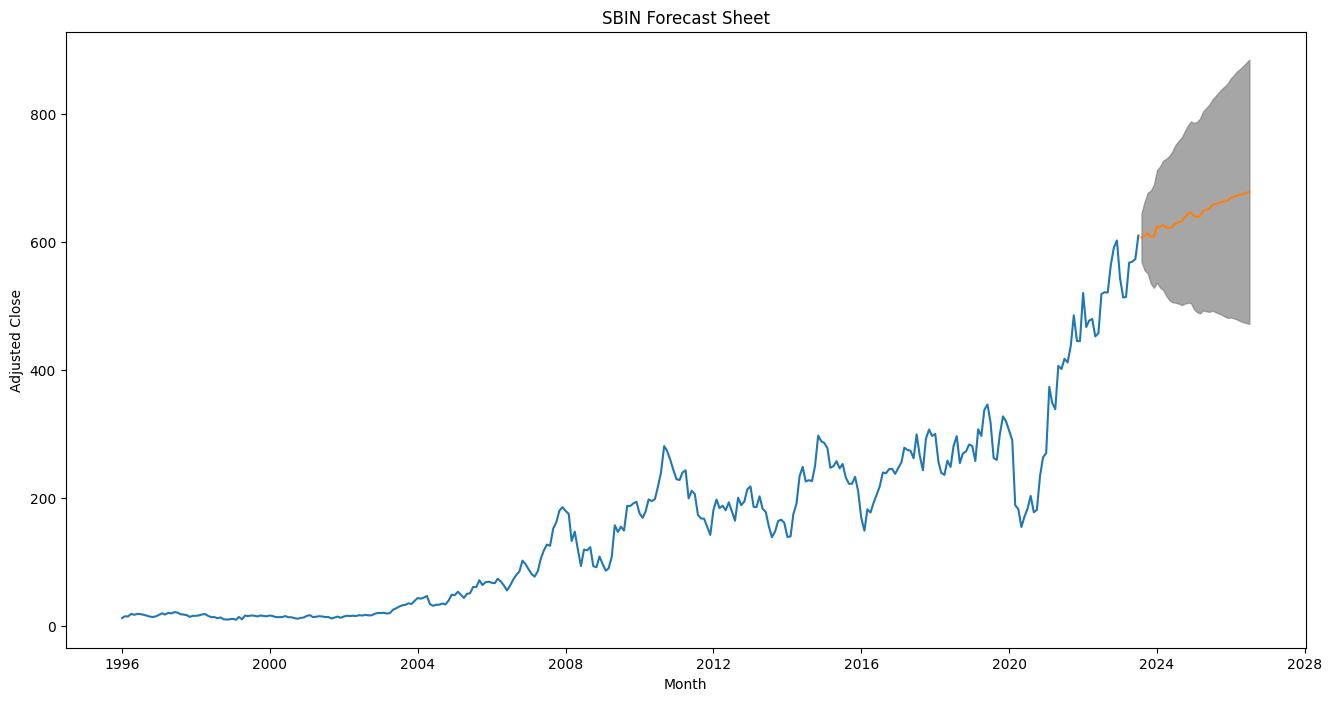

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(df['Adj Close'],label='Actual')
plt.plot(forecast,label='Forecast')
plt.fill_between(forecast.index,low_bound,upper_bound,alpha=0.7,color='gray',label='Confidence Intetrval')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title('SBIN Forecast Sheet')
plt.show()

In [23]:
n = int(0.8*len(df))
n

264

In [24]:
len(df)

331

In [25]:
len(df)-n

67

In [26]:
ytrain = df[0:n+1]
ytest = df[n:]

In [27]:
ytrain

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1996-01-01,18.691147,19.700714,16.705036,18.549620,12.229540,1587920924
1996-02-01,18.422243,24.460777,18.422243,22.672806,14.947904,1375442845
1996-03-01,22.927555,23.323835,20.474401,22.210480,14.643097,540202683
1996-04-01,21.700979,31.891005,21.700979,28.187685,18.583797,1937276750
1996-05-01,28.871737,29.390675,23.776726,26.182703,17.261938,3235907306
...,...,...,...,...,...,...
2017-09-01,277.649994,280.399994,249.500000,253.850006,242.941742,251103632
2017-10-01,253.850006,351.299988,241.149994,305.799988,292.659363,635028553
2017-11-01,309.399994,346.700012,306.649994,320.350006,306.584167,523180524


In [28]:
ytest

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,310.600006,332.750000,292.600006,313.250000,299.789246,467226485
2018-02-01,316.899994,317.399994,256.649994,268.000000,256.483704,506361276
2018-03-01,266.299988,270.000000,232.350006,249.899994,239.161453,491062494
2018-04-01,251.800003,265.000000,232.500000,246.399994,235.811874,387131760
2018-05-01,246.399994,274.799988,237.850006,269.549988,257.967072,493103116
...,...,...,...,...,...,...
2023-03-01,523.250000,567.900024,501.549988,523.750000,513.766235,345056294
2023-04-01,524.750000,580.450012,519.049988,578.299988,567.276367,389306777
2023-05-01,578.299988,596.400024,563.250000,579.849976,568.796814,420940668


In [29]:
model2 = auto_arima(ytrain['Adj Close'],seasonal=True, suppress_warnings=True, m=12)

In [30]:
forecast1, conf_int1 = model2.predict(n_periods=68, return_conf_int=True)

In [31]:
low_bound1 = conf_int1[:,0]
low_bound1 = pd.Series(low_bound1)
low_bound1.index = forecast1.index
low_bound1.head()

2018-02-01    269.220611
2018-03-01    264.332877
2018-04-01    252.337545
2018-05-01    249.689672
2018-06-01    242.751018
Freq: MS, dtype: float64

In [32]:
upper_bound1 = conf_int1[:,1]
upper_bound1 = pd.Series(upper_bound1)
upper_bound1.index=forecast1.index
upper_bound1.head()

2018-02-01    322.055333
2018-03-01    342.259274
2018-04-01    345.717008
2018-05-01    359.251884
2018-06-01    364.278774
Freq: MS, dtype: float64

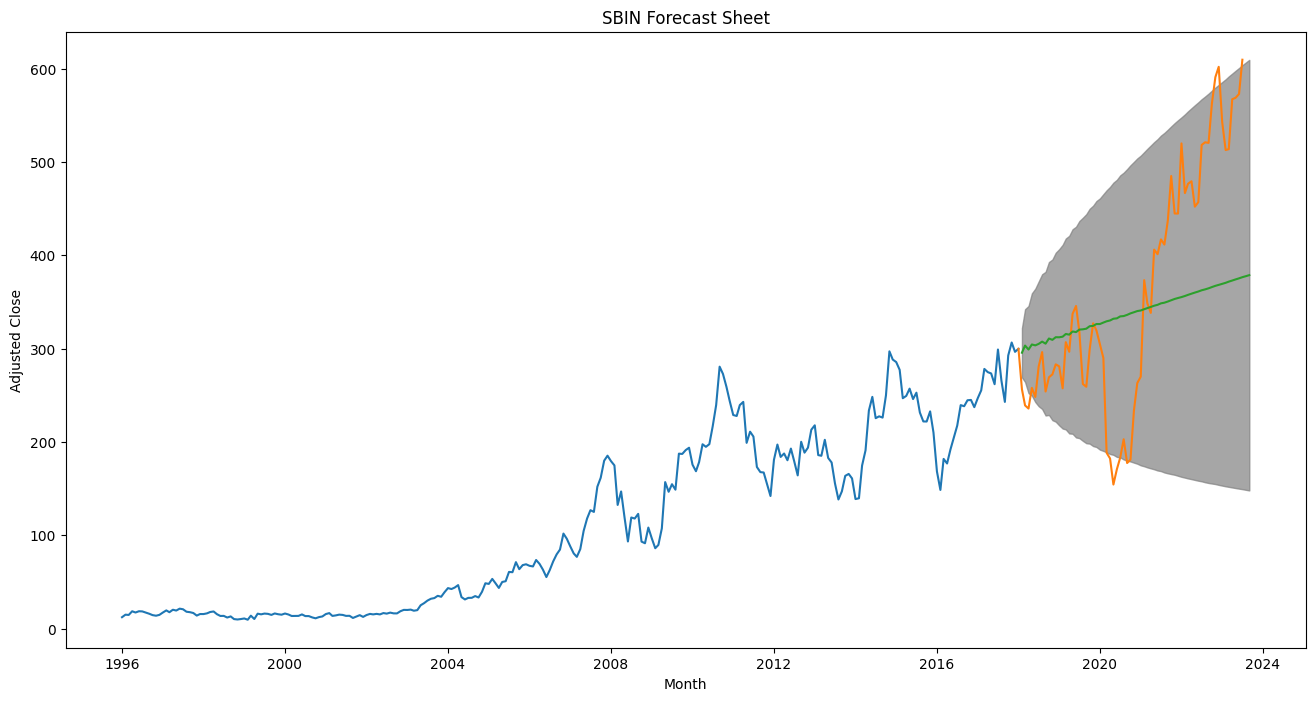

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(ytrain['Adj Close'],label='Train')
plt.plot(ytest['Adj Close'])
plt.plot(forecast1,label='Forecast')
plt.fill_between(forecast1.index,low_bound1,upper_bound1,alpha=0.7,color='gray',label='Confidence Intetrval')
plt.xlabel('Month')
plt.ylabel('Adjusted Close')
plt.title('SBIN Forecast Sheet')
plt.show()